In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
austo_data=pd.read_csv("austo_automobile+%282%29+%281%29.csv")

In [3]:
austo_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
austo_data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [5]:
print('no of rows :',austo_data.shape[0],'\n','no of columns:',austo_data.shape[1])

no of rows : 1581 
 no of columns: 14


In [6]:
austo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [7]:
austo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [8]:
austo_data["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

note that the gender has got a mistake, Let's add the other two females spelled incorrectly into the proper appropriate features

In [9]:
austo_data['Gender'].replace('Femal','Female',inplace=True)

In [10]:
austo_data['Gender'].replace('Femle','Female',inplace=True)

In [11]:
austo_data['Gender'].replace('nan','Female',inplace=True)

In [12]:
austo_data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

Thus, note that the gender issue is sorted.

In [13]:
austo_data["Profession"].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

In [14]:
austo_data["Marital_status"].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [15]:
austo_data["Education"].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

In [16]:
austo_data["Personal_loan"].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [17]:
austo_data["House_loan"].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [18]:
austo_data["Partner_working"].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [19]:
austo_data["Make"].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

In [20]:
austo_data["No_of_Dependents"].value_counts()

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

Let's sort the null value issue

In [21]:
austo_data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Note that we have got missing values in the feature gender, so lets fill it with mode

In [22]:
austo_data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

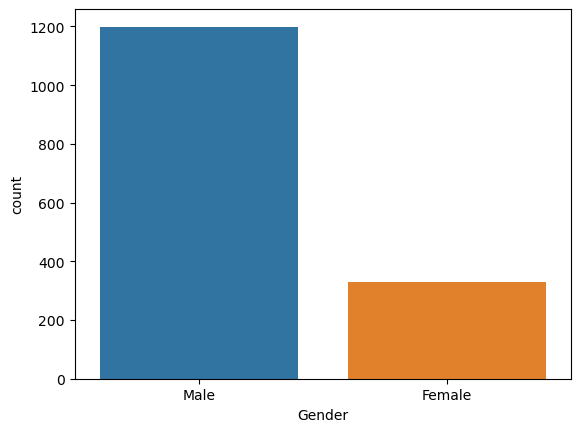

In [23]:
sns.countplot(data=austo_data,x='Gender')

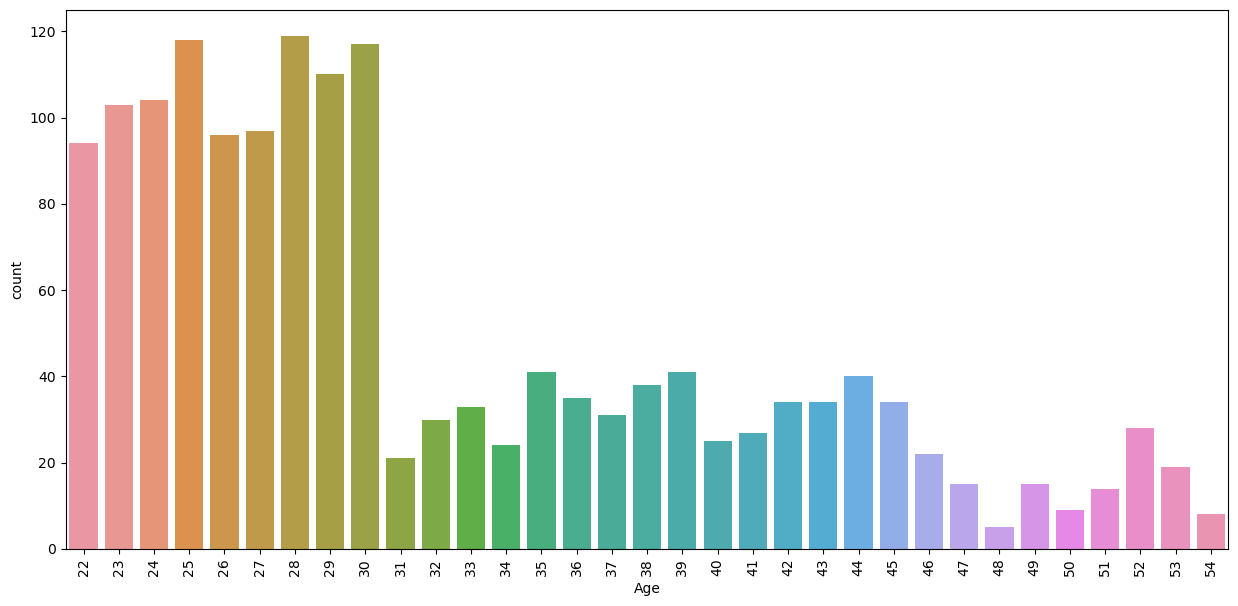

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(data=austo_data,x='Age');
plt.xticks(rotation=90);

In [25]:
austo_data.Gender.fillna(austo_data.Gender.mode()[0],inplace=True)

In [26]:
austo_data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
austo_data.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Note that we have got missing values in the feature partner salary, so lets fill it with mean

<Axes: xlabel='Partner_salary'>

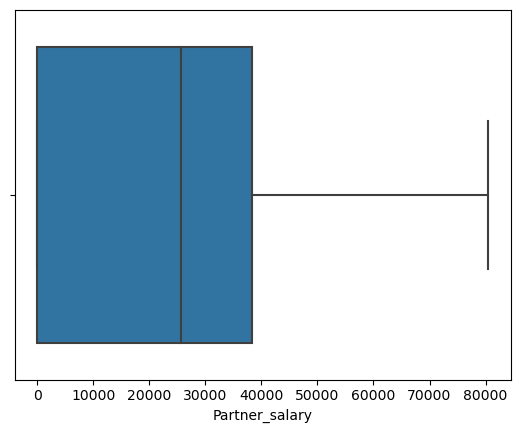

In [28]:
sns.boxplot(x='Partner_salary',data=austo_data)

In [29]:
austo_data.Partner_salary.fillna(austo_data.Partner_salary.mean(),inplace=True)

In [30]:
austo_data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [31]:
austo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20225.559322,18905.183912,0.0,0.0,24900.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [32]:
austo_data.shape

(1581, 14)

lets check for duplicates

In [33]:
dups=austo_data.duplicated()
print("no of duplicate rows = %d" % (dups.sum()))

no of duplicate rows = 0


In [34]:
austo_data.shape

(1581, 14)

In [35]:
austo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


<Axes: xlabel='Salary'>

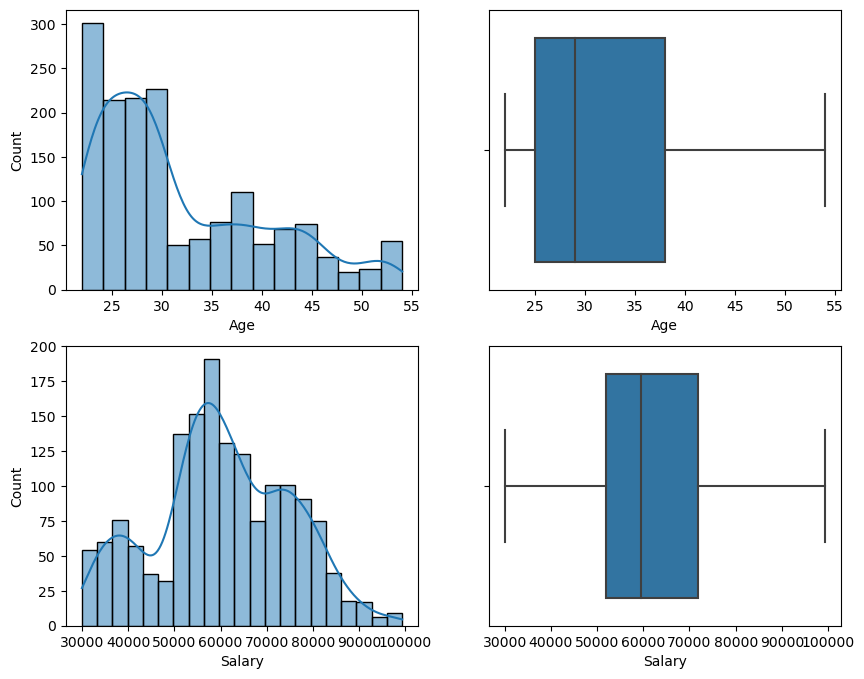

In [36]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.histplot(austo_data['Age'],kde=True,ax=axes[0][0])
sns.boxplot(x='Age',data=austo_data,ax=axes[0][1])
sns.histplot(austo_data['Salary'],kde=True,ax=axes[1][0])
sns.boxplot(x='Salary',data=austo_data,ax=axes[1][1])


there are no outliers present in the features age and salary

<Axes: xlabel='Total_salary'>

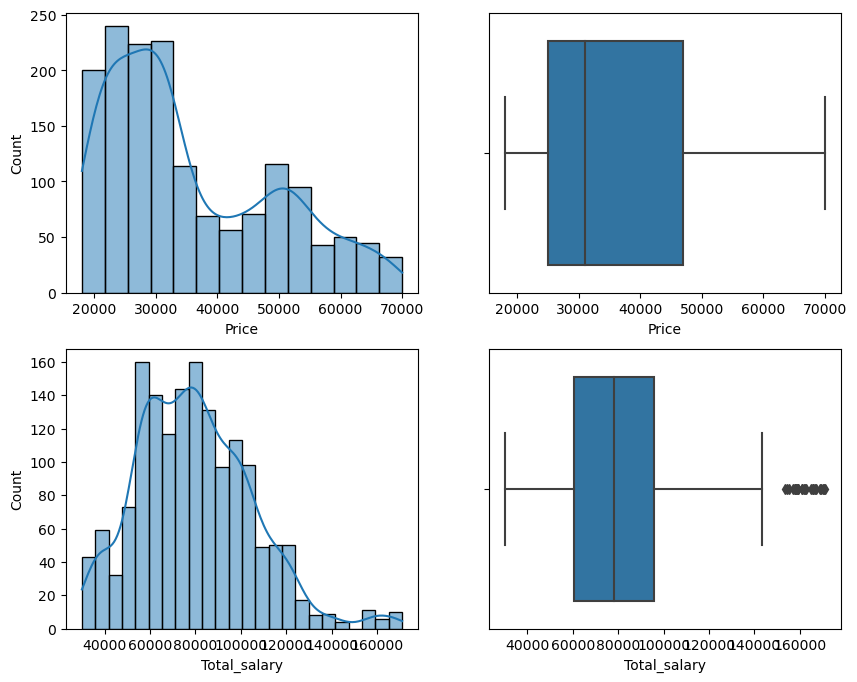

In [37]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.histplot(austo_data['Price'],kde=True,ax=axes[0][0])
sns.boxplot(x='Price',data=austo_data,ax=axes[0][1])
sns.histplot(austo_data['Total_salary'],kde=True,ax=axes[1][0])
sns.boxplot(x='Total_salary',data=austo_data,ax=axes[1][1])

<Axes: xlabel='Partner_salary'>

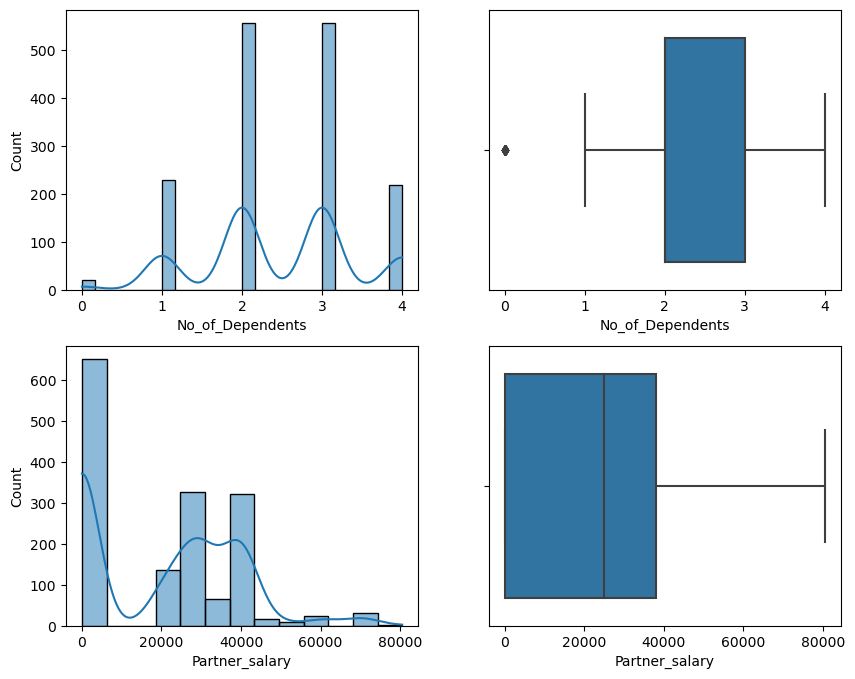

In [38]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.histplot(austo_data['No_of_Dependents'],kde=True,ax=axes[0][0])
sns.boxplot(x='No_of_Dependents',data=austo_data,ax=axes[0][1])
sns.histplot(austo_data['Partner_salary'],kde=True,ax=axes[1][0])
sns.boxplot(x='Partner_salary',data=austo_data,ax=axes[1][1])

In [39]:
austo_data['Make'].value_counts(normalize=True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

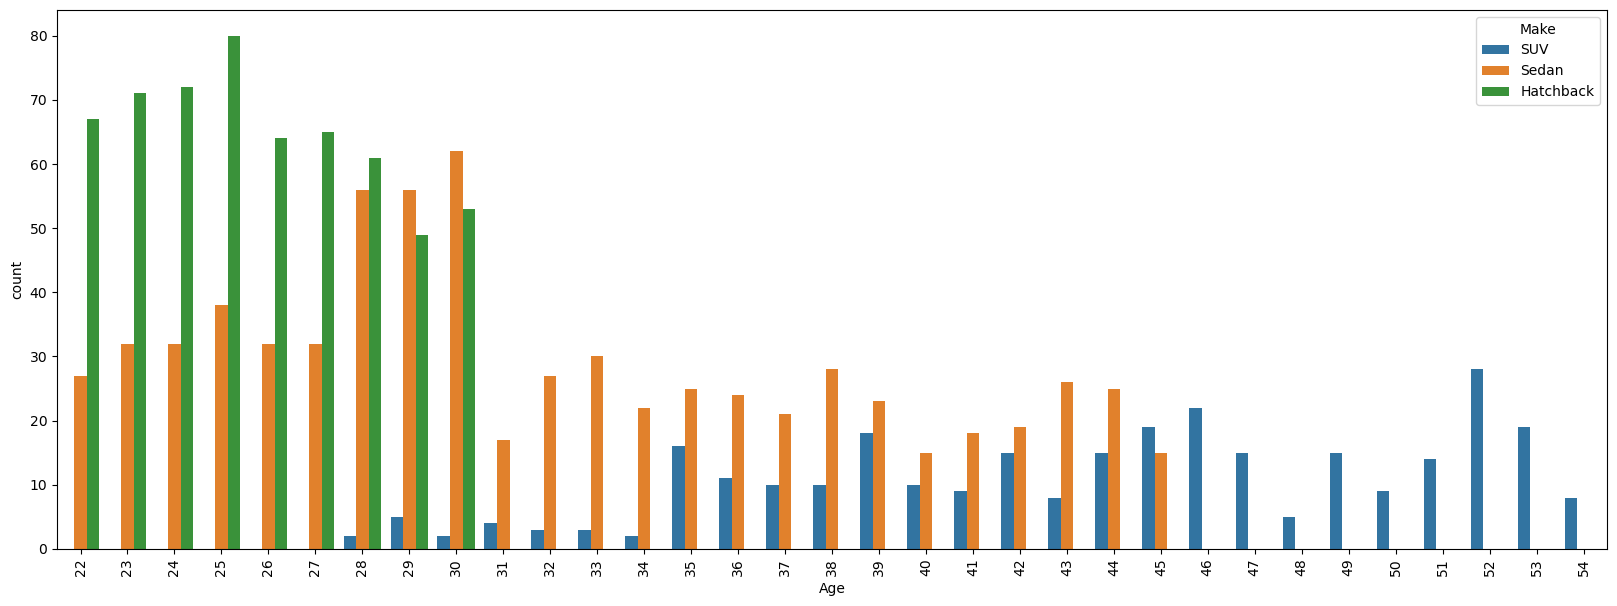

In [40]:
plt.figure(figsize=(20,7))
sns.countplot(x='Age',data=austo_data,hue='Make')
plt.xticks(rotation=90);

<Axes: xlabel='Age', ylabel='Price'>

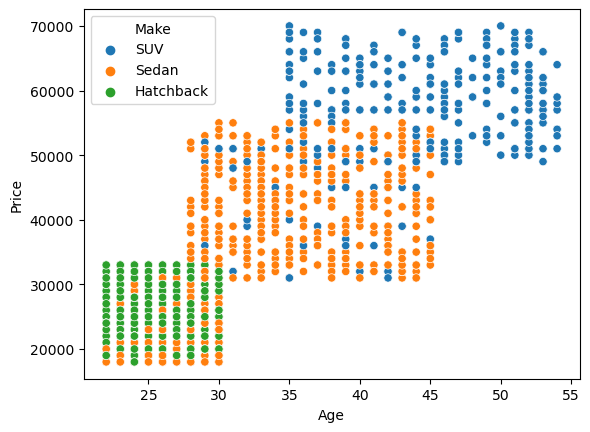

In [41]:
sns.scatterplot(x="Age",y='Price',hue='Make',data=austo_data)

<Axes: xlabel='Gender', ylabel='count'>

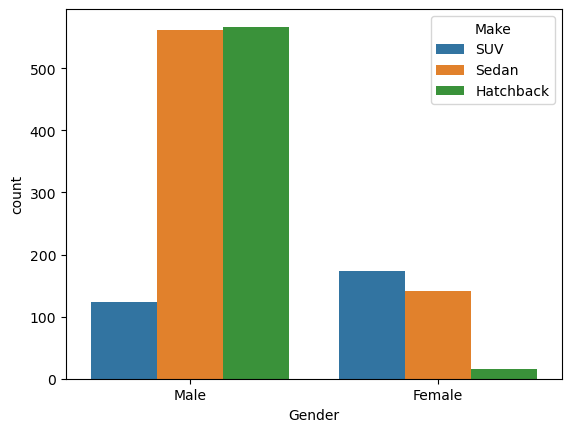

In [42]:
sns.countplot(x='Gender',hue='Make',data=austo_data)

In [43]:
pd.crosstab(austo_data['Gender'],austo_data['Make'],margins=True,normalize=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.109424,0.089184,0.208096
Male,0.358634,0.078431,0.354839,0.791904
All,0.368121,0.187856,0.444023,1.000000


44 percent of the customers tend to buy Sedan

<Axes: xlabel='Make', ylabel='Total_salary'>

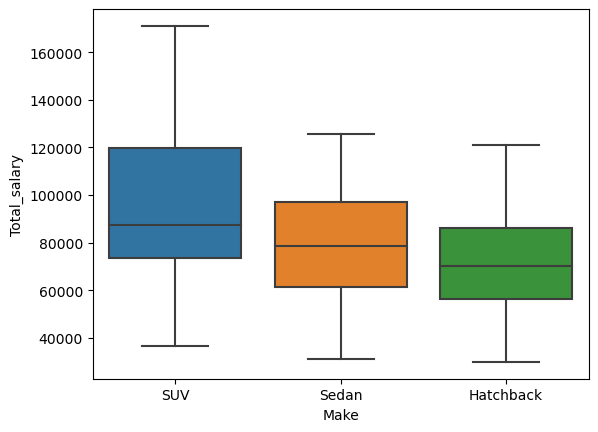

In [44]:
fig_dims=(12,5)
sns.boxplot(x='Make',y='Total_salary',data=austo_data)

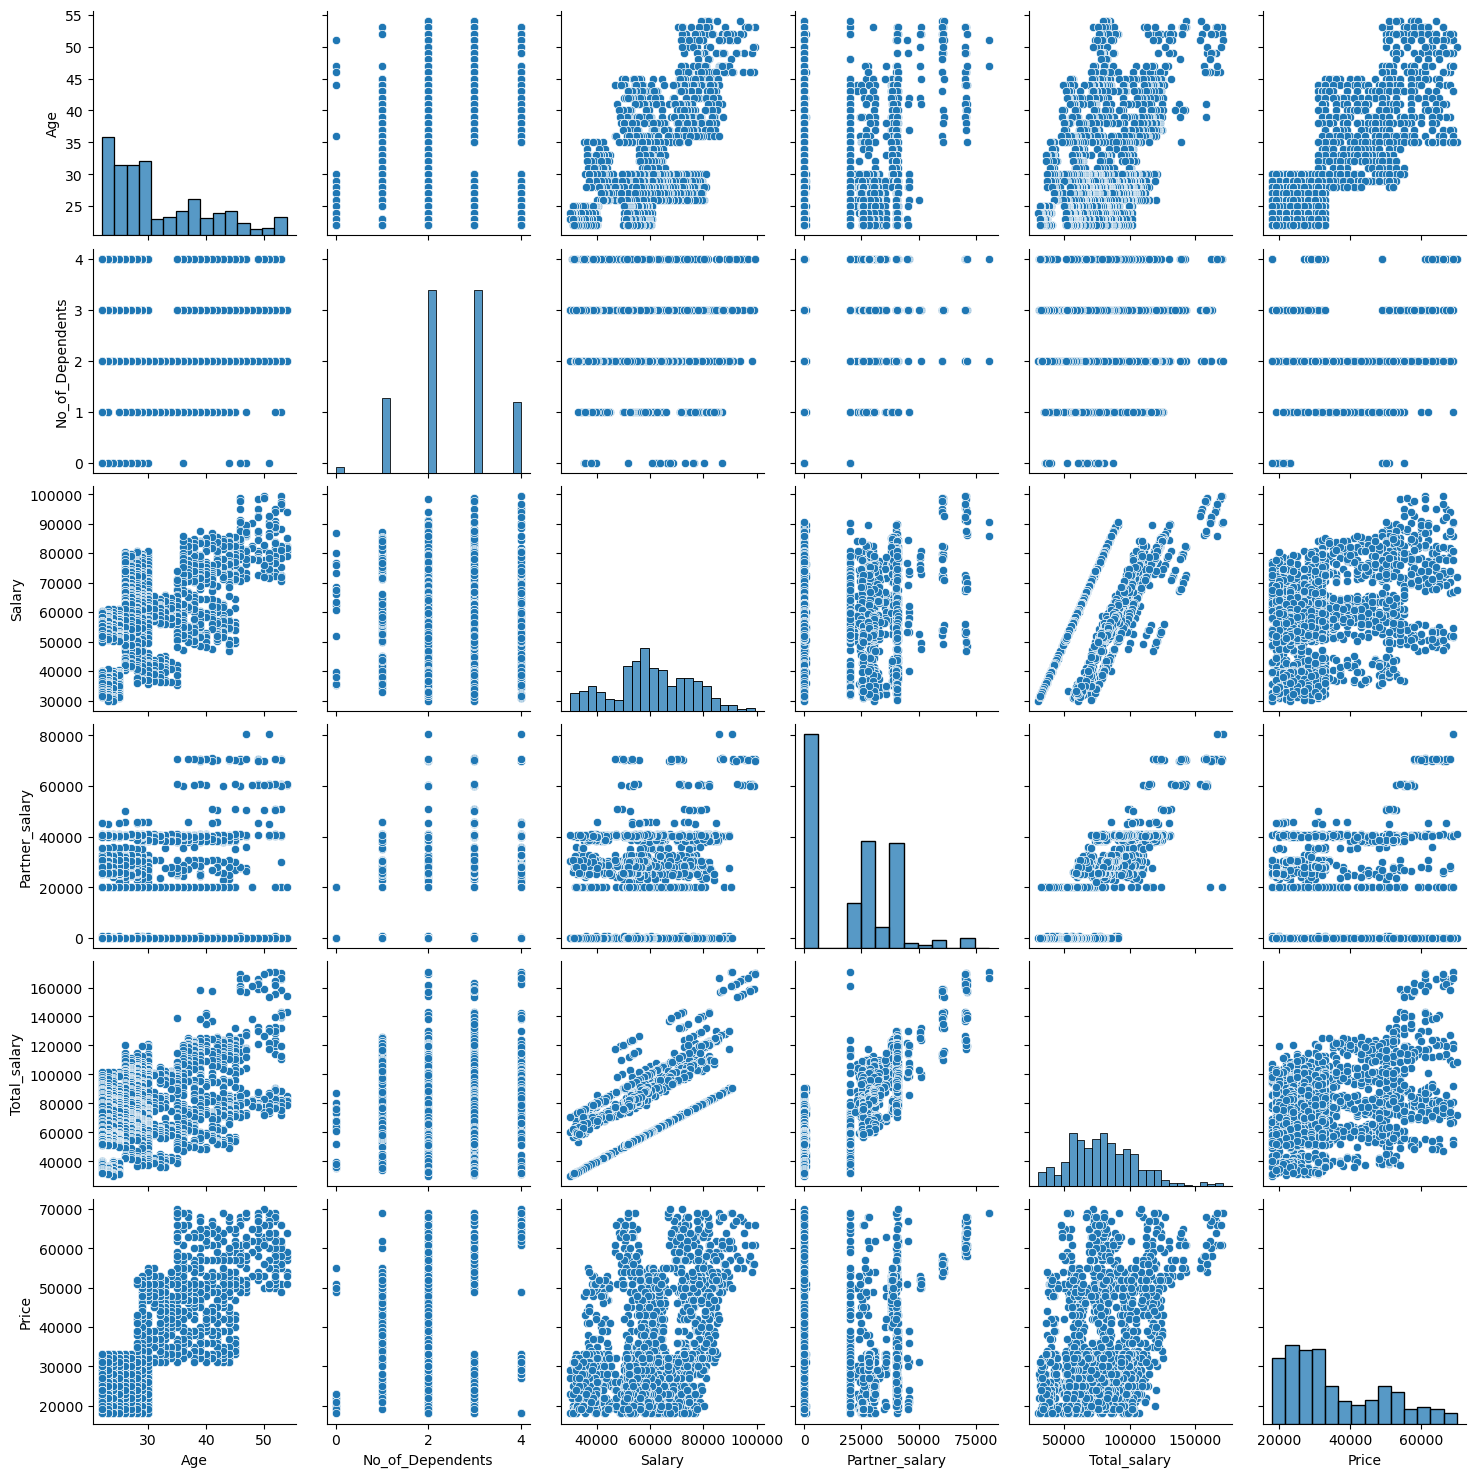

In [45]:
sns.pairplot(austo_data)

C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_23344\3179543899.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(austo_data.corr(),annot=True,fmt='.2f');


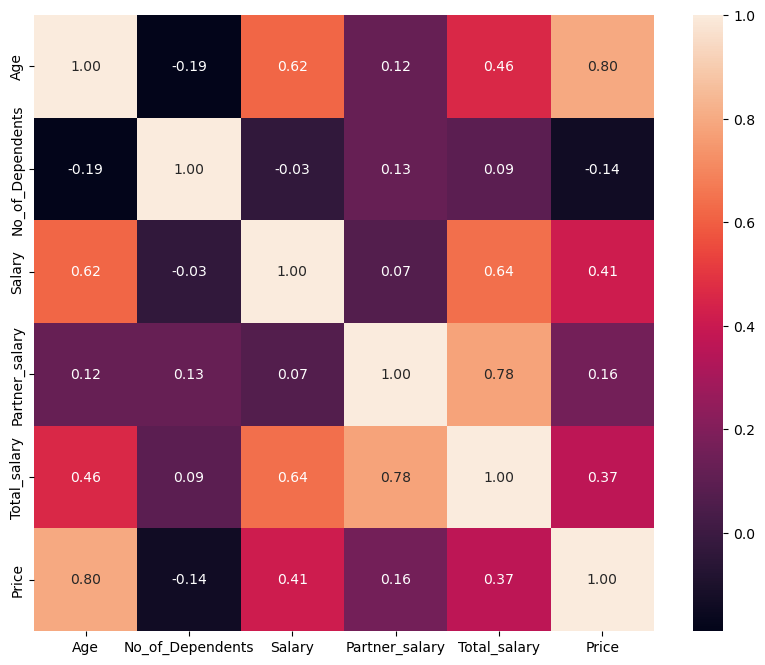

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(austo_data.corr(),annot=True,fmt='.2f');

there is strong correlation between few fields and weak correlation between few fields

MULTIVARIATE ANALYSIS

<Axes: xlabel='Age', ylabel='Personal_loan'>

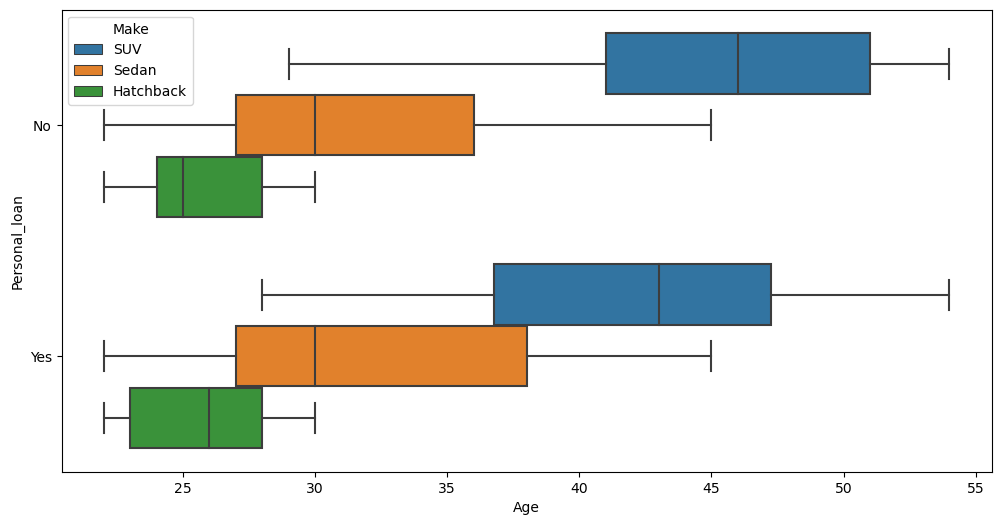

In [47]:
fig_dims=(12,6)
fig=plt.subplots(figsize=fig_dims)
sns.boxplot(x='Age',y='Personal_loan',hue='Make',data=austo_data)

median age of who have not taken personal loan is higher than the customers who have taken loan

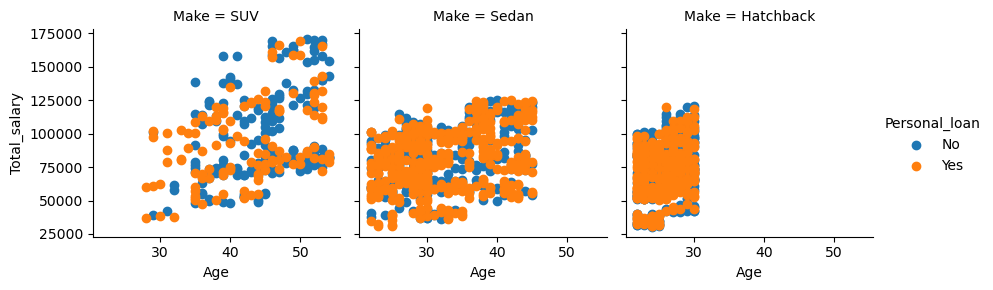

In [48]:
g= sns.FacetGrid(austo_data,col='Make',hue='Personal_loan',col_wrap=3,height=3)
g=g.map(plt.scatter,'Age','Total_salary')
g.add_legend()

<Axes: xlabel='Total_salary'>

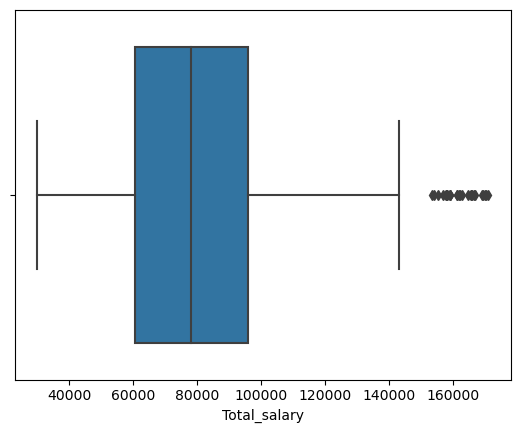

In [49]:
sns.boxplot(x='Total_salary',data=austo_data)

In [50]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,(25,75))
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
    
lr,ur=detect_outlier(austo_data['Total_salary'])
print(lr,ur)


7400.0 149000.0


In [51]:
austo_data['Total_salary']=np.where(austo_data['Total_salary']>ur,ur,austo_data['Total_salary'])
austo_data['Total_salary']=np.where(austo_data['Total_salary']<lr,lr,austo_data['Total_salary'])

<Axes: xlabel='Total_salary'>

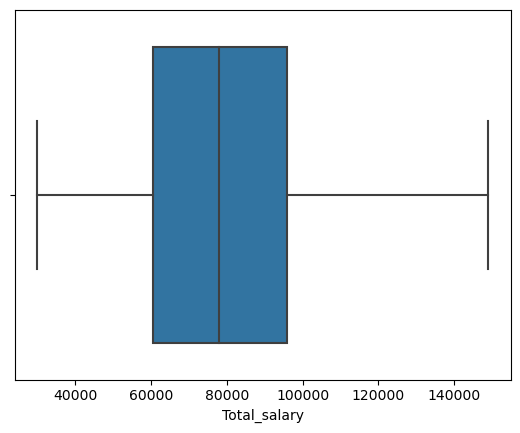

In [52]:
sns.boxplot(x='Total_salary',data=austo_data)

<Axes: xlabel='Gender', ylabel='count'>

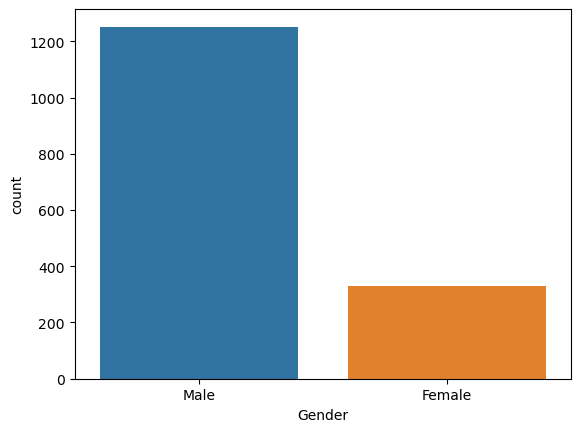

In [53]:
sns.countplot(x='Gender',data=austo_data)

<Axes: xlabel='Marital_status', ylabel='count'>

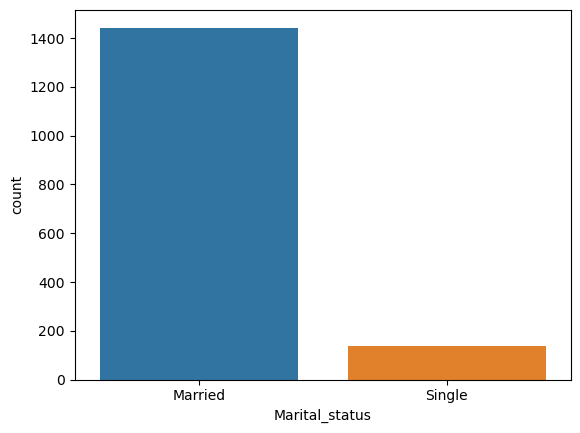

In [54]:
sns.countplot(x='Marital_status',data=austo_data)

<Axes: xlabel='Marital_status', ylabel='count'>

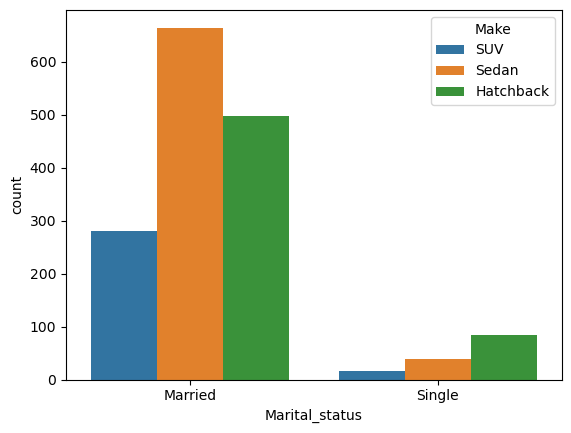

In [55]:
sns.countplot(x='Marital_status',hue='Make',data=austo_data)

<Axes: xlabel='Profession', ylabel='count'>

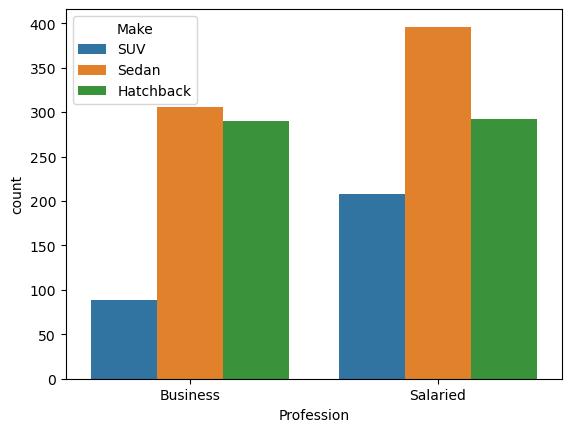

In [56]:
sns.countplot(x='Profession',hue='Make',data=austo_data)

<Axes: xlabel='Education', ylabel='count'>

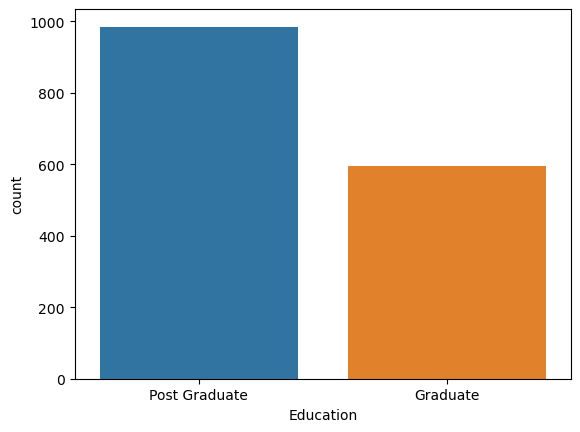

In [57]:
sns.countplot(x='Education',data=austo_data)

<Axes: xlabel='House_loan', ylabel='count'>

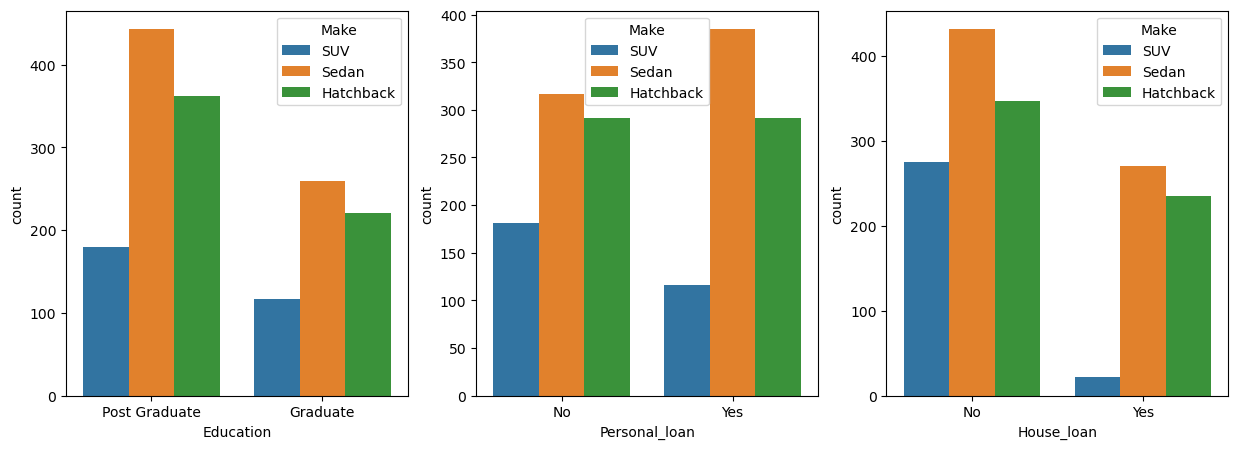

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x='Education',data=austo_data,hue='Make')
plt.subplot(1,3,2)
sns.countplot(x='Personal_loan',data=austo_data,hue='Make')
plt.subplot(1,3,3)
sns.countplot(x='House_loan',data=austo_data,hue='Make')



<Axes: xlabel='Make', ylabel='count'>

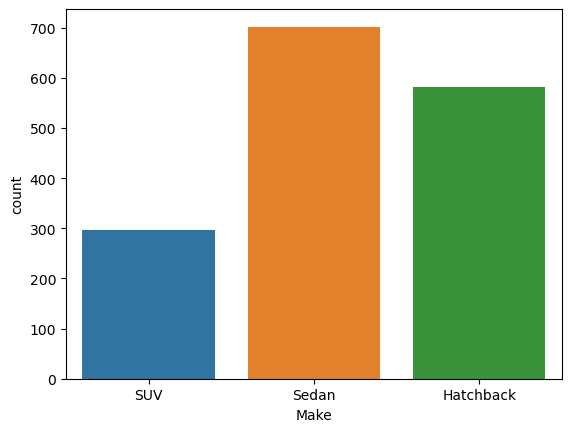

In [59]:
sns.countplot(x='Make',data=austo_data)

In [60]:
austo_data.groupby(['Make'])['Price'].mean()

Make
Hatchback    26474.226804
SUV          55824.915825
Sedan        34603.988604
Name: Price, dtype: float64

<Axes: xlabel='Salary', ylabel='Price'>

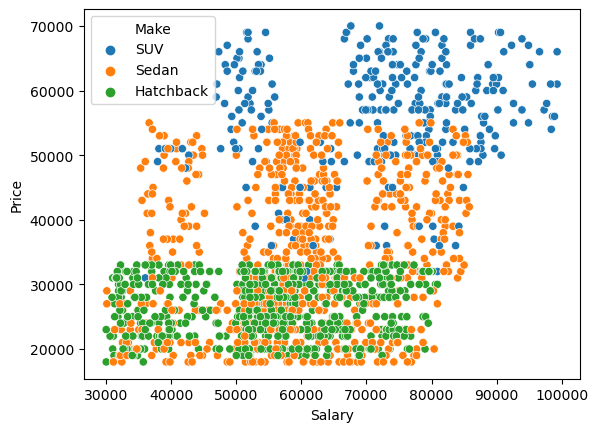

In [61]:
sns.scatterplot(x="Salary",y='Price',hue='Make',data=austo_data)



<Axes: xlabel='Age', ylabel='count'>

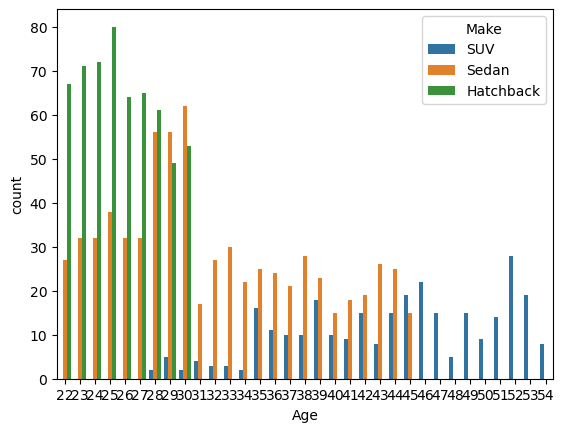

In [62]:
sns.countplot(x='Age',data=austo_data,hue='Make')

In [92]:
austo_data.groupby(['Profession', 'Make']).Gender.value_counts()

Profession  Make       Gender
Business    Hatchback  Male      290
            SUV        Female     55
                       Male       34
            Sedan      Male      256
                       Female     50
Salaried    Hatchback  Male      277
                       Female     15
            SUV        Female    118
                       Male       90
            Sedan      Male      305
                       Female     91
Name: Gender, dtype: int64

In [93]:
austo_data.groupby(['Gender', 'Profession']).Make.value_counts()

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    SUV          118
                    Sedan         91
                    Hatchback     15
Male    Business    Hatchback    290
                    Sedan        256
                    SUV           34
        Salaried    Sedan        305
                    Hatchback    277
                    SUV           90
Name: Make, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

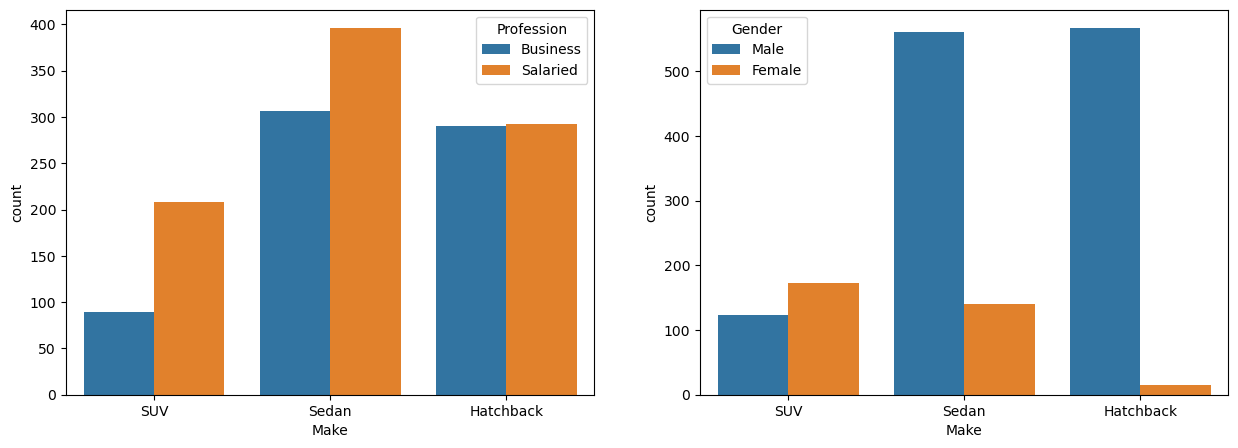

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Make',data=austo_data,hue='Profession')
plt.subplot(1,2,2)
sns.countplot(x='Make',data=austo_data,hue='Gender')


<Axes: xlabel='Make', ylabel='count'>

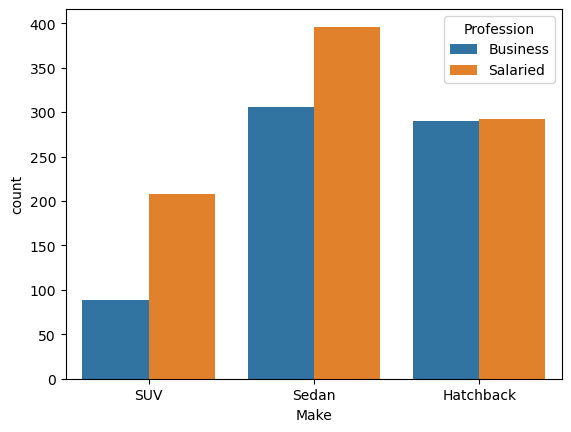

In [64]:
sns.countplot(x='Make',data=austo_data,hue='Profession')

<Axes: xlabel='Gender', ylabel='Price'>

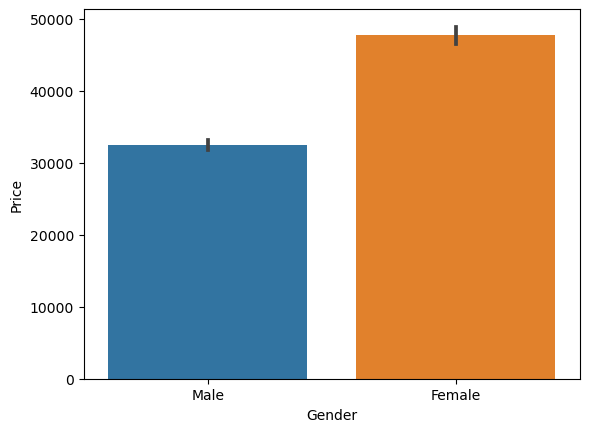

In [65]:
sns.barplot(data=austo_data,x='Gender',y='Price')

<Axes: xlabel='Personal_loan', ylabel='Price'>

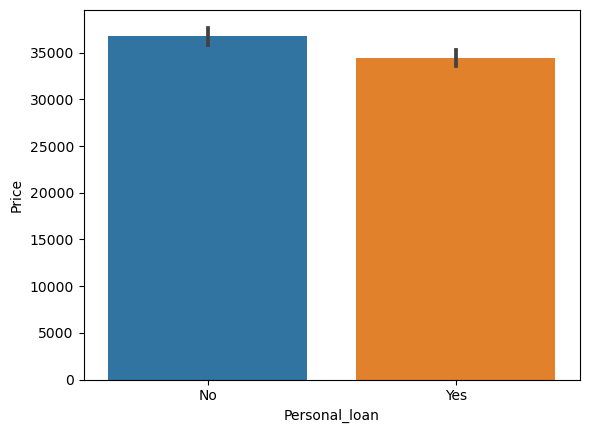

In [66]:
sns.barplot(data=austo_data,x='Personal_loan',y='Price')

In [67]:
austo_data['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [68]:
austo_data['Personal_loan'].min()

'No'

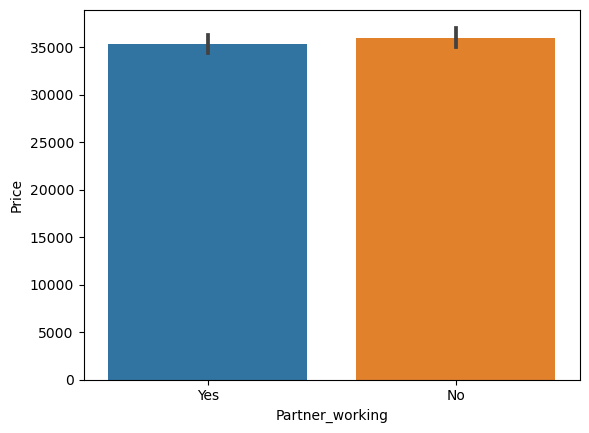

In [69]:
sns.barplot(data=austo_data,x='Partner_working',y='Price')
plt.show()

In [70]:
pd.crosstab(austo_data['Gender'],austo_data['Make'],margins=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,173,141,329
Male,567,124,561,1252
All,582,297,702,1581


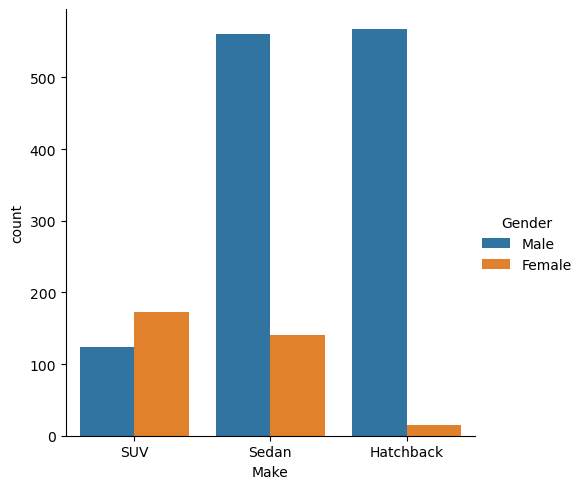

In [90]:
sns.catplot(data=austo_data,x='Make',hue='Gender',kind='count')

<Axes: xlabel='Make', ylabel='count'>

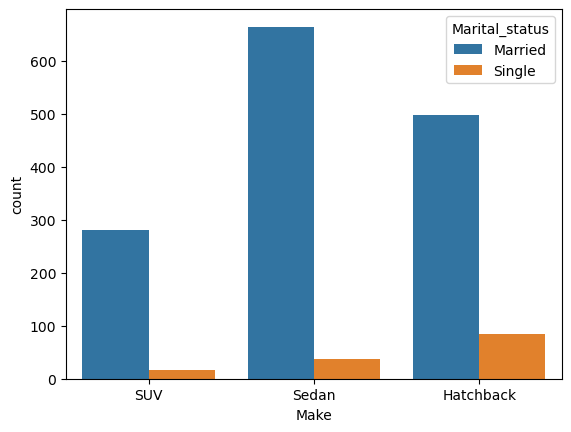

In [71]:
sns.countplot(x='Make',data=austo_data,hue='Marital_status')

In [72]:
pd.crosstab(austo_data['Marital_status'],austo_data['Make'],margins=True)

Make,Hatchback,SUV,Sedan,All
Marital_status,,,,
Married,498,281,664,1443
Single,84,16,38,138
All,582,297,702,1581


In [73]:
austo_data['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

<Axes: xlabel='Marital_status', ylabel='count'>

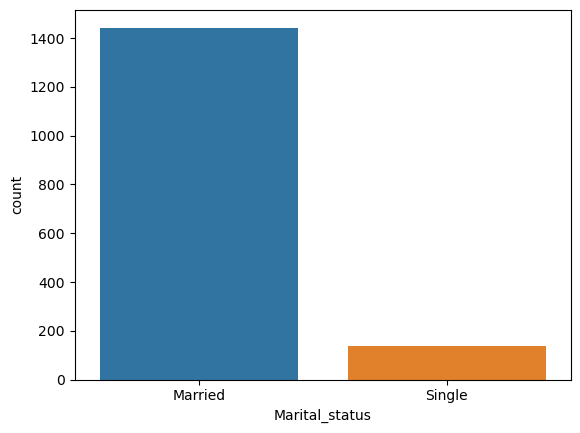

In [74]:
sns.countplot(x='Marital_status',data=austo_data)

In [75]:
god_data=pd.read_excel("godigt_cc_data.xlsx")

In [76]:
god_data.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [77]:
god_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [78]:
god_data.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [79]:
god_data.Transactor_revolver.fillna(god_data.Transactor_revolver.mode()[0],inplace=True)

In [80]:
god_data.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [81]:
god_data.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


<Axes: xlabel='widget_products'>

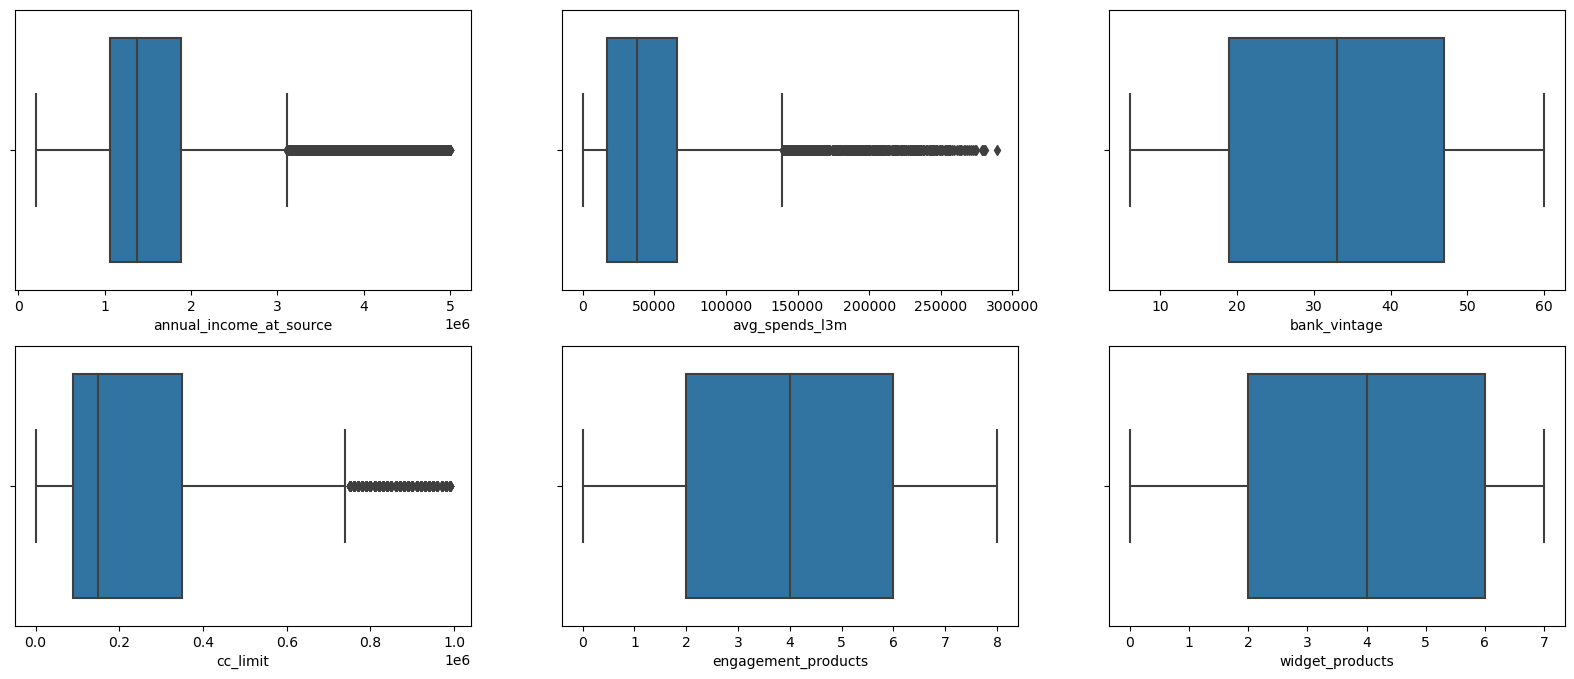

In [82]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,8))
sns.boxplot(x='annual_income_at_source',data=god_data,ax=axes[0][0])
sns.boxplot(x='avg_spends_l3m',data=god_data,ax=axes[0][1])
sns.boxplot(x='bank_vintage',data=god_data,ax=axes[0][2])
sns.boxplot(x='cc_limit',data=god_data,ax=axes[1][0])
sns.boxplot(x='engagement_products',data=god_data,ax=axes[1][1])
sns.boxplot(x='widget_products',data=god_data,ax=axes[1][2])

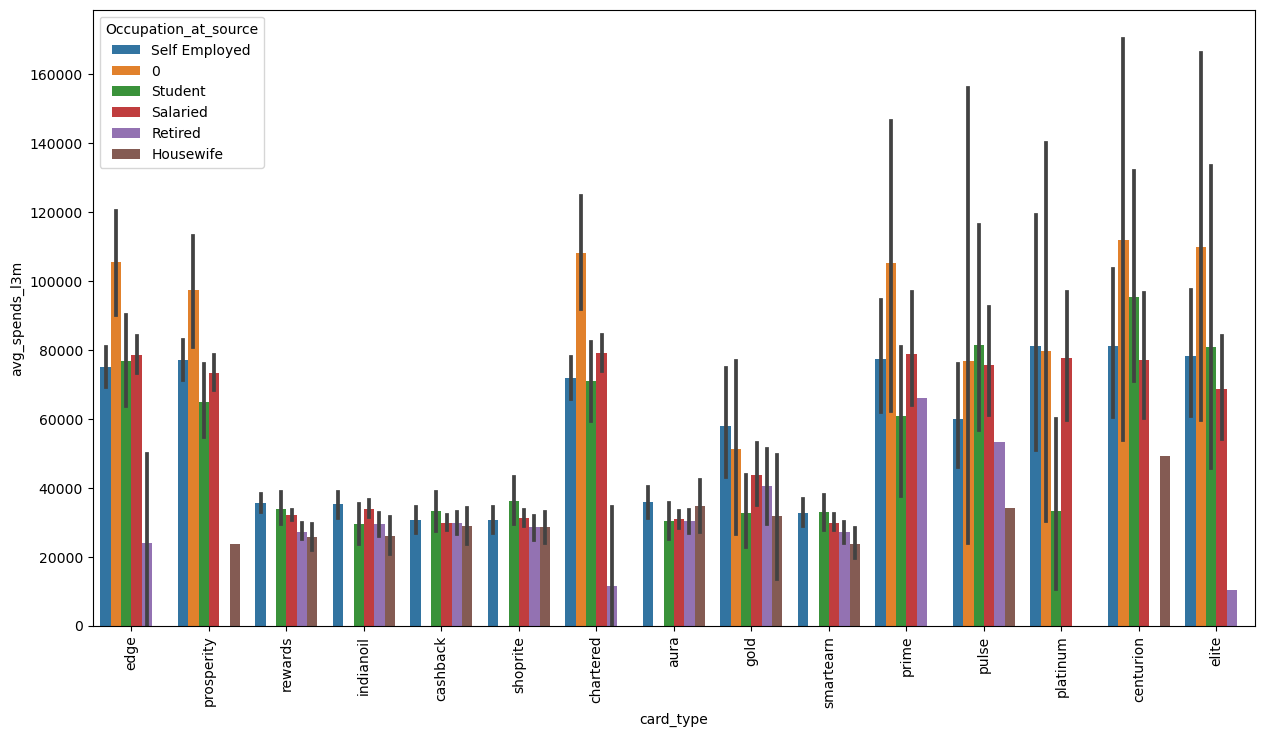

In [83]:
plt.figure(figsize=(15,8))
sns.barplot(data=god_data,x='card_type',y='avg_spends_l3m',hue='Occupation_at_source')
plt.xticks(rotation=90);